## Welcome to Week 4, Day 4

This is the start of an AWESOME project! Really simple and very effective.

### First - a heads up for Windows PC users

While executing this notebook, you might hit a problem with the Playwright browser raising a NotImplementedError.

This should work when we move to python modules, but it can cause problems in Windows in a notebook.

If you it this error and would like to run the notebook, you need to make a small change which seems quite hacky!

1. Right click in `.venv` in the File Explorer on the left and select "Find in folder"
2. Search for `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())`  
3. That code should be found in a line of code in a file called `kernelapp.py`
4. Comment out the entire else clause that this line is a part of - see the fragment below
5. Restart the kernel by pressing the "Restart" button above

```python
        if sys.platform.startswith("win") and sys.version_info >= (3, 8):
            import asyncio
 
            try:
                from asyncio import WindowsProactorEventLoopPolicy, WindowsSelectorEventLoopPolicy
            except ImportError:
                pass
                # not affected
           # else:
            #    if type(asyncio.get_event_loop_policy()) is WindowsProactorEventLoopPolicy:
                    # WindowsProactorEventLoopPolicy is not compatible with tornado 6
                    # fallback to the pre-3.8 default of Selector
                    # asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())
```

Thank you to student Nicolas for finding this, and to Kalyan, Yaki, Zibin and Bhaskar for confirming that this worked for them!

As an alternative, you can just move to a Python module (which we do anyway in Day 5)

In [15]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langchain.agents import Tool
from langgraph.checkpoint.memory import MemorySaver


In [2]:
load_dotenv(override=True)

True

### Asynchronous LangGraph

To run a tool:  
Sync: `tool.run(inputs)`  
Async: `await tool.arun(inputs)`

To invoke the graph:  
Sync: `graph.invoke(state)`  
Async: `await graph.ainvoke(state)`

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)

In [4]:
pushover_token = os.getenv("PUSHOVER_TOKEN")
pushover_user = os.getenv("PUSHOVER_USER")
pushover_url = "https://api.pushover.net/1/messages.json"

def push(text: str):
    """Send a push notification to the user"""
    requests.post(pushover_url, data = {"token": pushover_token, "user": pushover_user, "message": text})

tool_push = Tool(
        name="send_push_notification",
        func=push,
        description="useful for when you want to send a push notification"
    )

### Next: Install Playwright

On Windows and MacOS:  
`playwright install`

On Linux:  
`playwright install —with-reps chromium`

Student Mariano R. mentioned that you might also need to do this in a cursor terminal:

`uv run playwright install chromium`

### Introducing nest_asyncio

Python async code only allows for one "event loop" processing aynchronous events.

The `nest_asyncio` library patches this, and is used for special situations, if you need to run a nested event loop.



In [5]:
import nest_asyncio
nest_asyncio.apply()

### The LangChain community

One of the remarkable things about LangChain is the rich community around it.

Check this out:


In [6]:
from langchain_community.agent_toolkits import PlayWrightBrowserToolkit
from langchain_community.tools.playwright.utils import create_async_playwright_browser

# If you get a NotImplementedError here or later, see the Heads Up at the top of the notebook

async_browser =  create_async_playwright_browser(headless=False)  # headful mode
toolkit = PlayWrightBrowserToolkit.from_browser(async_browser=async_browser)
tools = toolkit.get_tools()

In [7]:
for tool in tools:
    print(f"{tool.name}={tool}")

click_element=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\DeepADabhi\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
navigate_browser=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\DeepADabhi\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
previous_webpage=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\DeepADabhi\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
extract_text=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\DeepADabhi\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
extract_hyperlinks=async_browser=<Browser type=<BrowserType name=chromium executable_path=C:\Users\DeepADabhi\AppData\Local\ms-playwright\chromium-1169\chrome-win\chrome.exe> version=136.0.7103.25>
get_elements=async_browse

In [ ]:
tool_dict = {tool.name:tool for tool in tools}

navigate_tool = tool_dict.get("navigate_browser")
extract_text_tool = tool_dict.get("extract_text")

await navigate_tool.arun({"url": "https://en.wikipedia.org/wiki/Srinivasa_Ramanujan"})
text = await extract_text_tool.arun({})

In [9]:
print(text)

Srinivasa Ramanujan - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Pages for logged out editors learn more Contributions Talk Contents move to sidebar hide (Top) 1 Early life 2 Adulthood in India Toggle Adulthood in India subsection 2.1 Pursuit of career in mathematics 2.2 Contacting British mathematicians 3 Life in England 4 Illness and death 5 Personality and spiritual life 6 Mathematical achievements Toggle Mathematical achievements subsection 6.1 The Ramanujan conjecture 6.2 Ramanujan's notebooks 7 Hardy–Ramanujan number 1729 8 Mathematicians' views of Ramanujan 9 Posthumous recognition 10 Commemorative postal stamps 11 In popular culture 12 Selected papers 13 Further works of Ramanujan's mat

In [10]:
import textwrap
print(textwrap.fill(text))

Srinivasa Ramanujan - Wikipedia Jump to content Main menu Main menu
move to sidebar hide Navigation Main page Contents Current events
Random article About Wikipedia Contact us Contribute Help Learn to
edit Community portal Recent changes Upload file Special pages Search
Search Appearance Donate Create account Log in Personal tools Donate
Create account Log in Pages for logged out editors learn more
Contributions Talk Contents move to sidebar hide (Top) 1 Early life 2
Adulthood in India Toggle Adulthood in India subsection 2.1 Pursuit of
career in mathematics 2.2 Contacting British mathematicians 3 Life in
England 4 Illness and death 5 Personality and spiritual life 6
Mathematical achievements Toggle Mathematical achievements subsection
6.1 The Ramanujan conjecture 6.2 Ramanujan's notebooks 7
Hardy–Ramanujan number 1729 8 Mathematicians' views of Ramanujan 9
Posthumous recognition 10 Commemorative postal stamps 11 In popular
culture 12 Selected papers 13 Further works of Ramanujan's mat

In [11]:
all_tools = tools + [tool_push]

In [12]:
from langchain_google_genai import ChatGoogleGenerativeAI
google_api_key = os.getenv("GOOGLE_API_KEY")
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=google_api_key)
# llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(all_tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


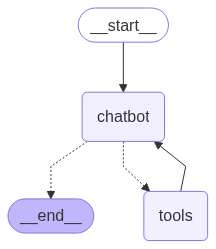

In [13]:

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=all_tools))
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
config = {"configurable": {"thread_id": "10"}}

async def chat(user_input: str, history):
    result = await graph.ainvoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
